# NLST Predictions Match

Match and put together NLST predictions for Kiran, Thijmen, PanCan and Sybil (after those predictions have ran).

In [1]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set_style("white")
from evalutils.roc import get_bootstrapped_roc_ci_curves
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.metrics as skl_metrics

## directory where results are
LOCAL_PC = False
root_dir = "W:" if LOCAL_PC else "/data/bodyct"
EXPERIMENT_DIR = f"{root_dir}/experiments/lung-malignancy-fairness-shaurya"
NLST_PREDS = f"{EXPERIMENT_DIR}/nlst-preds"

### Kiran and Pancan Results
`NLST_DL_vs_PanCan_Venk21.csv`

In [117]:
kiran_pancan = pd.read_csv(f"{NLST_PREDS}/NLST_DL_vs_PanCan_Venk21.csv")
kiran_pancan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            16077 non-null  int64  
 1   StudyDate            16077 non-null  int64  
 2   SeriesInstanceUID    16077 non-null  object 
 3   CoordX               16077 non-null  float64
 4   CoordY               16077 non-null  float64
 5   CoordZ               16077 non-null  float64
 6   LesionID             16077 non-null  int64  
 7   NoduleType           16077 non-null  object 
 8   Spiculation          16077 non-null  bool   
 9   Diameter [mm]        16077 non-null  float64
 10  Age                  16077 non-null  float64
 11  Gender               16077 non-null  float64
 12  FamilyHistoryLungCa  16077 non-null  bool   
 13  Emphysema            16077 non-null  bool   
 14  NoduleInUpperLung    16077 non-null  bool   
 15  NoduleCounts         16077 non-null 

In [118]:
kiran_pancan.groupby('label').nunique()


,PatientID,StudyDate,SeriesInstanceUID,CoordX,CoordY,CoordZ,LesionID,NoduleType,Spiculation,Diameter [mm],...,NoduleInUpperLung,NoduleCounts,SCT_EPI_LOC,xie_gc_gclobe150,loclup,locrup,PanCan2b,DL,NoduleID,AnnotationID
label,,,,,,,,,,,,,,,,,,,,,
0,4596,3,8984,11099,12202,12578,18,5,2,308,...,2,12,7,0,0,0,12978,14828,9304,14828
1,686,3,1199,1225,1236,1231,3,3,2,286,...,2,11,6,6,2,2,1245,1249,720,1249


In [119]:
kiran_pancan = kiran_pancan.sort_values(by='AnnotationID', ascending=True).set_index("AnnotationID")

In [120]:
kiran_rerun = pd.read_csv(f"{NLST_PREDS}/20220816_NLST_Venk21_rerun.csv")
kiran_rerun = kiran_rerun.rename(columns={"Ensemble": "DL"})
kiran_rerun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          16077 non-null  int64  
 1   SeriesInstanceUID  16077 non-null  object 
 2   StudyDate          16077 non-null  int64  
 3   CoordX             16077 non-null  float64
 4   CoordY             16077 non-null  float64
 5   CoordZ             16077 non-null  float64
 6   Diameter [mm]      16077 non-null  float64
 7   NoduleType         16077 non-null  object 
 8   label              16077 non-null  int64  
 9   LesionID           16077 non-null  int64  
 10  NoduleID           16077 non-null  object 
 11  AnnotationID       16077 non-null  object 
 12  DL                 16077 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.6+ MB


In [121]:
kiran_rerun.groupby('label').nunique()

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,Diameter [mm],NoduleType,LesionID,NoduleID,AnnotationID,DL
label,,,,,,,,,,,,
0,4596,8984,3,11099,12202,12578,308,5,18,9304,14828,14828
1,686,1199,3,1225,1236,1231,286,3,3,720,1249,1249


In [122]:
kiran_rerun = kiran_rerun.sort_values(by='AnnotationID', ascending=True).set_index("AnnotationID")

### See if Kiran's Rerun Matches the Kiran v. Pancan results

In [123]:
kiran_cols = kiran_rerun.columns.to_list()
kiran_cols

['PatientID',
 'SeriesInstanceUID',
 'StudyDate',
 'CoordX',
 'CoordY',
 'CoordZ',
 'Diameter [mm]',
 'NoduleType',
 'label',
 'LesionID',
 'NoduleID',
 'DL']

In [124]:
## Check if Kiran's results line up across both CSVs.
kiran_pancan_subset = kiran_pancan[kiran_cols].sort_values(by='AnnotationID', ascending=True)
# kiran_pancan_subset = kiran_pancan_subset.drop(columns=['DL'])
kiran_pancan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16077 entries, 100012_1_19990102 to 218887_1_19990102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          16077 non-null  int64  
 1   SeriesInstanceUID  16077 non-null  object 
 2   StudyDate          16077 non-null  int64  
 3   CoordX             16077 non-null  float64
 4   CoordY             16077 non-null  float64
 5   CoordZ             16077 non-null  float64
 6   Diameter [mm]      16077 non-null  float64
 7   NoduleType         16077 non-null  object 
 8   label              16077 non-null  int64  
 9   LesionID           16077 non-null  int64  
 10  NoduleID           16077 non-null  object 
 11  DL                 16077 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.6+ MB


In [125]:
kiran_pancan_subset.compare(kiran_rerun)

CoordX       CoordY       CoordZ                  DL  \
                    self other   self other   self other          self   
AnnotationID                                                             
100012_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  9.856393e-01   
100012_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  9.985542e-01   
100019_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  7.203346e-01   
100035_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  3.152689e-04   
100035_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  5.275361e-04   
...                  ...   ...    ...   ...    ...   ...           ...   
218863_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.567247e-03   
218863_2_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.127662e-02   
218863_2_20010102    NaN   NaN    NaN   NaN    NaN   NaN  1.079622e-02   
218866_1_20000102    NaN   NaN    NaN   NaN    NaN   NaN  8.857844e-07   
218887_1_19990102    NaN   NaN    NaN   NaN    NaN   NaN  1.556763e-06   

                             
                      other  
AnnotationID                 
100012_1_19990102  0.985671  
100012_1_20000102  0.994192  
100019_1_20000102  0.688991  
100035_1_19990102  0.002529  
100035_1_20000102  0.009697  
...                     ...  
218863_1_19990102  0.002304  
218863_2_19990102  0.014281  
218863_2_20010102  0.003797  
218866_1_20000102  0.000026  
218887_1_19990102  0.000085  

[16077 rows x 8 columns]

#### Drop predictions

In [126]:
kiran_rerun_wo_preds = kiran_rerun.drop(columns=['DL'])
kiran_pancan_wo_preds = kiran_pancan_subset.drop(columns='DL')

coord_diffs = kiran_pancan_wo_preds.compare(kiran_rerun_wo_preds)
coord_diffs

CoordX                 CoordY                  CoordZ  \
                        self      other        self       other        self   
AnnotationID                                                                  
102676_1_20000102        NaN        NaN         NaN         NaN -145.595001   
104248_1_20000102        NaN        NaN -172.488266 -172.488266         NaN   
104248_2_19990102        NaN        NaN -162.213745 -162.213745         NaN   
112575_1_19990102        NaN        NaN         NaN         NaN -307.600006   
114746_1_19990102        NaN        NaN -143.754364 -143.754364         NaN   
114746_1_20000102        NaN        NaN -163.276749 -163.276749         NaN   
115831_1_20000102        NaN        NaN -145.118332 -145.118332         NaN   
120790_1_19990102        NaN        NaN   62.995483   62.995483         NaN   
126787_1_19990102        NaN        NaN -155.027359 -155.027359         NaN   
126823_1_19990102        NaN        NaN         NaN         NaN -283.600006   
126823_1_20000102        NaN        NaN -140.959915 -140.959915         NaN   
128940_1_19990102        NaN        NaN -148.889313 -148.889313         NaN   
129511_1_20000102        NaN        NaN         NaN         NaN -147.980011   
204571_1_19990102        NaN        NaN    5.831635    5.831635         NaN   
205687_1_19990102        NaN        NaN         NaN         NaN -143.194992   
209119_1_20000102  88.450348  88.450348         NaN         NaN         NaN   
209643_1_19990102        NaN        NaN         NaN         NaN -166.244995   
209643_1_20000102        NaN        NaN         NaN         NaN -178.345001   
210581_1_19990102        NaN        NaN         NaN         NaN -168.494995   
210774_1_19990102        NaN        NaN  -26.682854  -26.682854         NaN   
212202_1_20000102        NaN        NaN         NaN         NaN -141.669998   
213442_1_20000102        NaN        NaN         NaN         NaN -151.794998   
213442_1_20010102        NaN        NaN         NaN         NaN -149.119995   
215969_1_20000102        NaN        NaN         NaN         NaN -154.694992   

                               
                        other  
AnnotationID                   
102676_1_20000102 -145.595001  
104248_1_20000102         NaN  
104248_2_19990102         NaN  
112575_1_19990102 -307.600006  
114746_1_19990102         NaN  
114746_1_20000102         NaN  
115831_1_20000102         NaN  
120790_1_19990102         NaN  
126787_1_19990102         NaN  
126823_1_19990102 -283.600006  
126823_1_20000102         NaN  
128940_1_19990102         NaN  
129511_1_20000102 -147.980011  
204571_1_19990102         NaN  
205687_1_19990102 -143.194992  
209119_1_20000102         NaN  
209643_1_19990102 -166.244995  
209643_1_20000102 -178.345001  
210581_1_19990102 -168.494995  
210774_1_19990102         NaN  
212202_1_20000102 -141.669998  
213442_1_20000102 -151.794998  
213442_1_20010102 -149.119995  
215969_1_20000102 -154.694992

In [127]:
coord_diffs["CoordX_diff"] = coord_diffs["CoordX", "self"] - coord_diffs["CoordX", "other"]
coord_diffs["CoordY_diff"] = coord_diffs["CoordY", "self"] - coord_diffs["CoordY", "other"]
coord_diffs["CoordZ_diff"] = coord_diffs["CoordZ", "self"] - coord_diffs["CoordZ", "other"]
coord_diffs[["CoordX_diff", "CoordY_diff", "CoordZ_diff"]].describe()

,CoordX_diff,CoordY_diff,CoordZ_diff
,,,
count,1.000000e+00,1.100000e+01,1.200000e+01
mean,2.842171e-14,1.049665e-14,9.473903e-15
std,NaN,2.313979e-14,3.498471e-14
min,2.842171e-14,-2.842171e-14,-5.684342e-14
25%,2.842171e-14,-2.664535e-15,1.421085e-14
50%,2.842171e-14,2.842171e-14,2.842171e-14
75%,2.842171e-14,2.842171e-14,2.842171e-14
max,2.842171e-14,2.842171e-14,2.842171e-14


In [128]:
kiran_rerun_wo_coords = kiran_rerun.drop(columns=['CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords = kiran_pancan_subset.drop(columns=['CoordX', 'CoordY', 'CoordZ'])

pred_diffs = kiran_pancan_wo_coords.compare(kiran_rerun_wo_coords)
pred_diffs

DL          
                           self     other
AnnotationID                             
100012_1_19990102  9.856393e-01  0.985671
100012_1_20000102  9.985542e-01  0.994192
100019_1_20000102  7.203346e-01  0.688991
100035_1_19990102  3.152689e-04  0.002529
100035_1_20000102  5.275361e-04  0.009697
...                         ...       ...
218863_1_19990102  1.567247e-03  0.002304
218863_2_19990102  1.127662e-02  0.014281
218863_2_20010102  1.079622e-02  0.003797
218866_1_20000102  8.857844e-07  0.000026
218887_1_19990102  1.556763e-06  0.000085

[16077 rows x 2 columns]

In [129]:
pred_diffs["DL_diff"] = pred_diffs["DL", "self"] - pred_diffs["DL", "other"]
pred_diffs["DL_diff_abs"] = abs(pred_diffs["DL_diff"])
pred_diffs[["DL_diff", "DL_diff_abs"]].describe()

,DL_diff,DL_diff_abs
,,
count,16077.000000,1.607700e+04
mean,-0.036692,6.596979e-02
std,0.144521,1.337178e-01
min,-0.975755,3.391535e-12
25%,-0.026556,2.566306e-04
50%,-0.000493,5.384831e-03
75%,0.000034,6.132662e-02
max,0.902938,9.757554e-01


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2352: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  g.data = pd.merge(


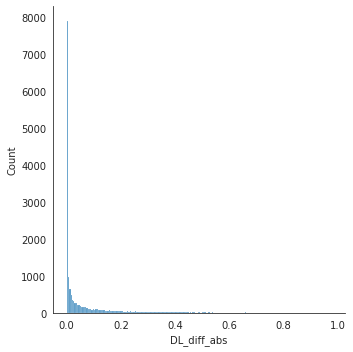

In [130]:
sns.displot(pred_diffs, x='DL_diff_abs')

In [135]:
pred_diffs.sort_values(by='DL_diff_abs', ascending=False).head(20)

DL             DL_diff DL_diff_abs
                       self     other                      
AnnotationID                                               
203641_2_19990102  0.020526  0.996281 -0.975755    0.975755
106396_2_19990102  0.025154  0.957037 -0.931883    0.931883
204228_3_20000102  0.013618  0.929715 -0.916097    0.916097
210232_2_20000102  0.044599  0.957699 -0.913099    0.913099
200047_1_20010102  0.071073  0.982822 -0.911749    0.911749
203008_1_19990102  0.036190  0.945469 -0.909279    0.909279
214672_1_19990102  0.025829  0.929623 -0.903793    0.903793
218383_4_20010102  0.910167  0.007229  0.902938    0.902938
113705_1_20010102  0.008496  0.911409 -0.902913    0.902913
115001_4_20000102  0.014957  0.908043 -0.893086    0.893086
133933_1_20000102  0.036598  0.921834 -0.885236    0.885236
106862_5_20010102  0.053703  0.934705 -0.881003    0.881003
115536_1_20000102  0.024409  0.905174 -0.880765    0.880765
111427_1_19990102  0.013160  0.890726 -0.877566    0.877566
210232_2_19990102  0.105043  0.981230 -0.876187    0.876187
218174_1_20010102  0.060453  0.933392 -0.872938    0.872938
204228_3_19990102  0.015696  0.881084 -0.865388    0.865388
109131_2_19990102  0.022713  0.887313 -0.864599    0.864599
108794_2_20000102  0.069285  0.930374 -0.861089    0.861089
214672_1_20000102  0.085973  0.941424 -0.855451    0.855451

In [136]:
kiran_rerun_wo_coords_preds = kiran_rerun.drop(columns=['DL', 'CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords_preds = kiran_pancan_subset.drop(columns=['DL', 'CoordX', 'CoordY', 'CoordZ'])
kiran_pancan_wo_coords_preds.equals(kiran_rerun_wo_coords_preds)

True